In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Disaster_Alert_Data__Enhanced_.csv")
data.head()

,Date,Province,District,Type,Occurred,Alerts,Month,Week,Alert Outcome
0,8/6/2025,KPK,"Chitral, Dir, Swat, Kalam, Mansehra, Battagram...",rain,1,1,2025-08,2025-08-04/2025-08-10,True Positive
1,8/6/2025,GB & AJK,"Gilgit Baltistan and AJK, including Gilgit, Sk...",landslide,0,1,2025-08,2025-08-04/2025-08-10,False Positive
2,8/6/2025,GB,"Kashmir region (including (Neelum valley, Muza...",flash flood,1,1,2025-08,2025-08-04/2025-08-10,True Positive
3,8/6/2025,Punjab,"Punjab including Islamabad, Rawalpindi, Jhelum...",rain,1,1,2025-08,2025-08-04/2025-08-10,True Positive
4,8/5/2025,Punjab,"Islamabad, Rawalpindi, Jhelum, Chakwal, Talaga...",rain,1,1,2025-08,2025-08-04/2025-08-10,True Positive


In [5]:
# Count yes/no per Type
counts = pd.crosstab(data['Type'], data['Occurred']).rename(columns={0:'Incorrect', 1:'Correct'})
counts.loc["overall"] = counts.sum()
counts.sort_values(by="Correct", ascending=False, inplace=True)
counts

Occurred,Incorrect,Correct
Type,,
overall,22,147
rain,4,85
flash flood,4,18
flood,8,16
thunderstorm,1,13
glof,3,7
landslide,1,6
heat wave,0,2
drought,1,0


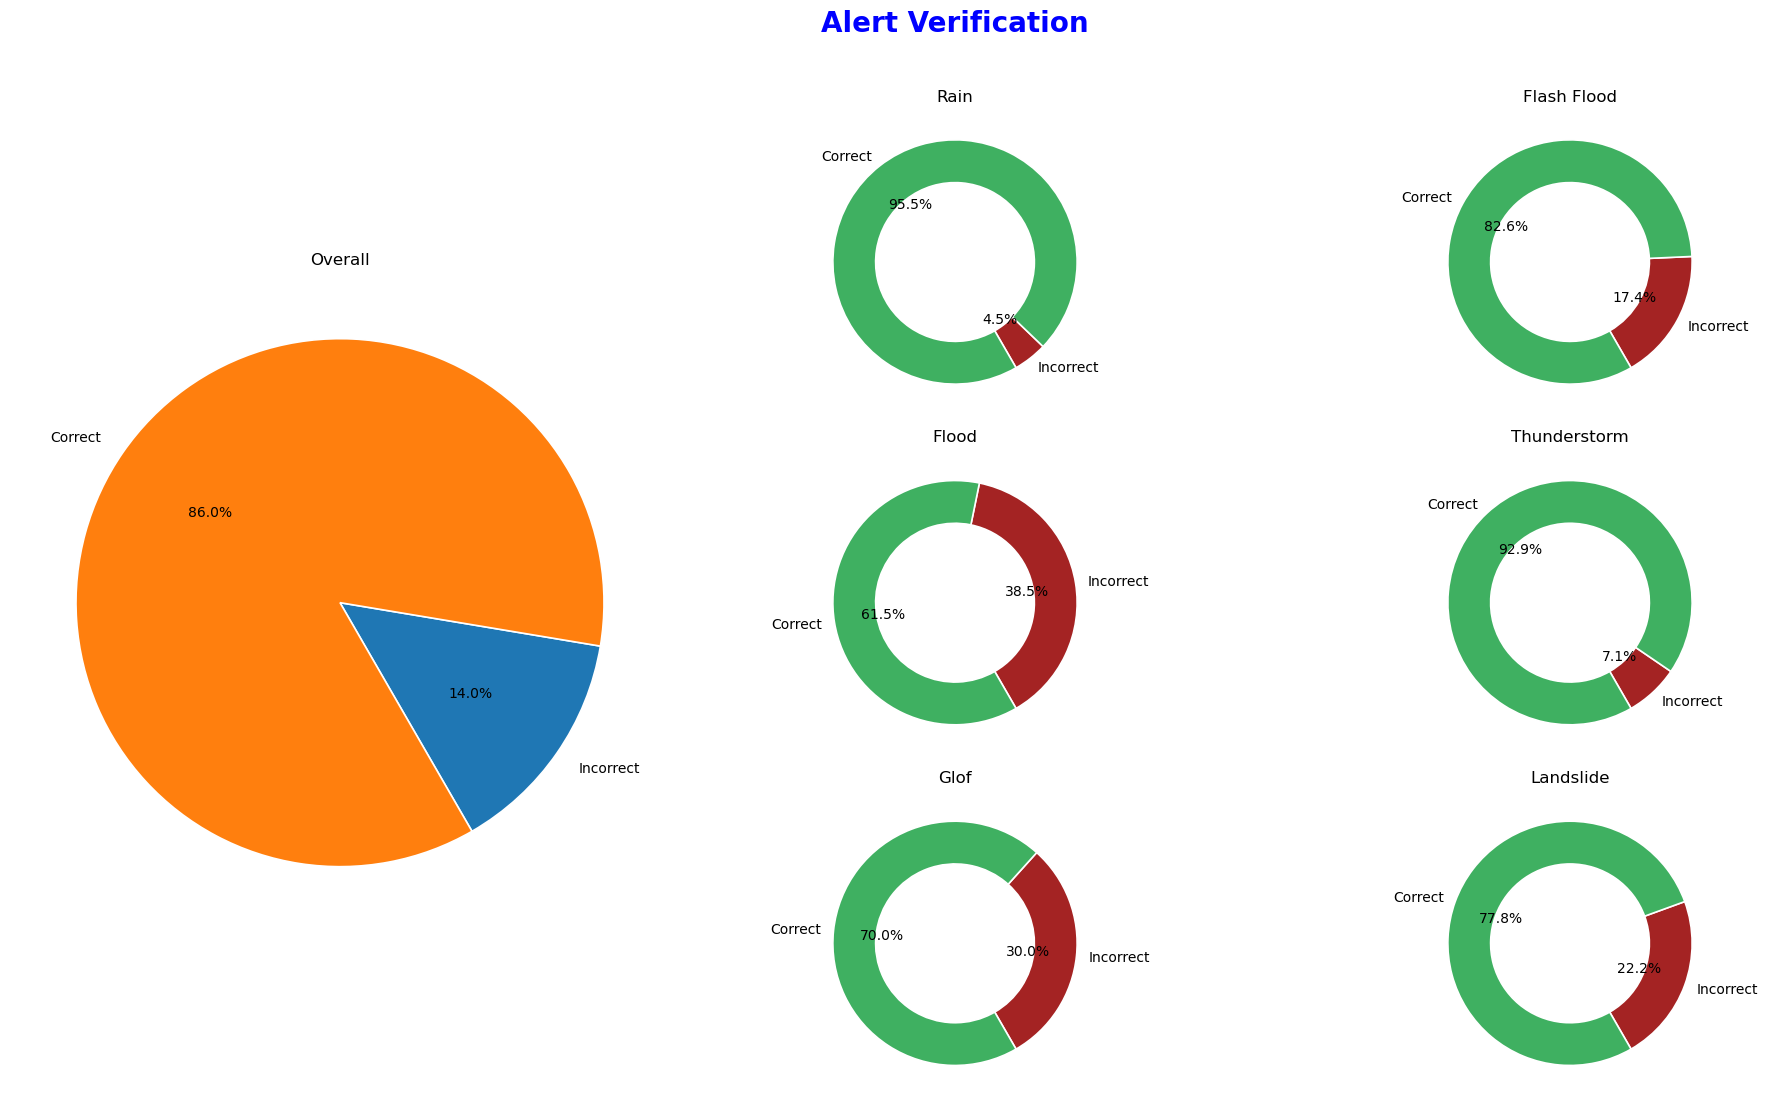

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(19.20, 10.80))
gs = fig.add_gridspec(nrows=3, ncols=3)

# --- Big pie (Overall) spans all rows of the left column ---
ax_big = fig.add_subplot(gs[:, :1])
counts.loc["overall"].plot.pie(
    autopct='%1.1f%%',
    startangle=300,
    ax=ax_big,
    ylabel='',
    title="Overall",
    wedgeprops={"edgecolor": "white", "linewidth": 1.2}
)
ax_big.set(aspect="equal")

# --- Small donuts ("cycle") on the right two columns ---
types = [t for t in counts.index if t != "overall"]
for i, disaster in enumerate(types):
    r, c = divmod(i, 2)
    ax = fig.add_subplot(gs[r, 1 + c])
    counts.loc[disaster].plot.pie(
        autopct='%1.1f%%',
        startangle=300,
        ax=ax,
        ylabel='',
        title=disaster.title(),
        colors=["#a42323", "#3FB061"],
        wedgeprops={"width": 0.35, "edgecolor": "white", "linewidth": 1.2}
    )
    ax.set(aspect="equal")
# 🔹 Add main title here
fig.suptitle("Alert Verification", fontsize=20, color="blue", fontweight="bold", y=1.02)

plt.tight_layout()
plt.show()


In [7]:
grouped = data.groupby("Province")[["Occurred","Alerts"]].sum()
grouped = grouped[grouped.Alerts > 2]
grouped

,Occurred,Alerts
Province,,
Balochistan,12,14
GB,6,7
GB & AJK,5,6
KP,6,6
KPK,30,32
Pakistan,2,4
Pothohar Region,9,9
Punjab,40,44
Sindh,11,16


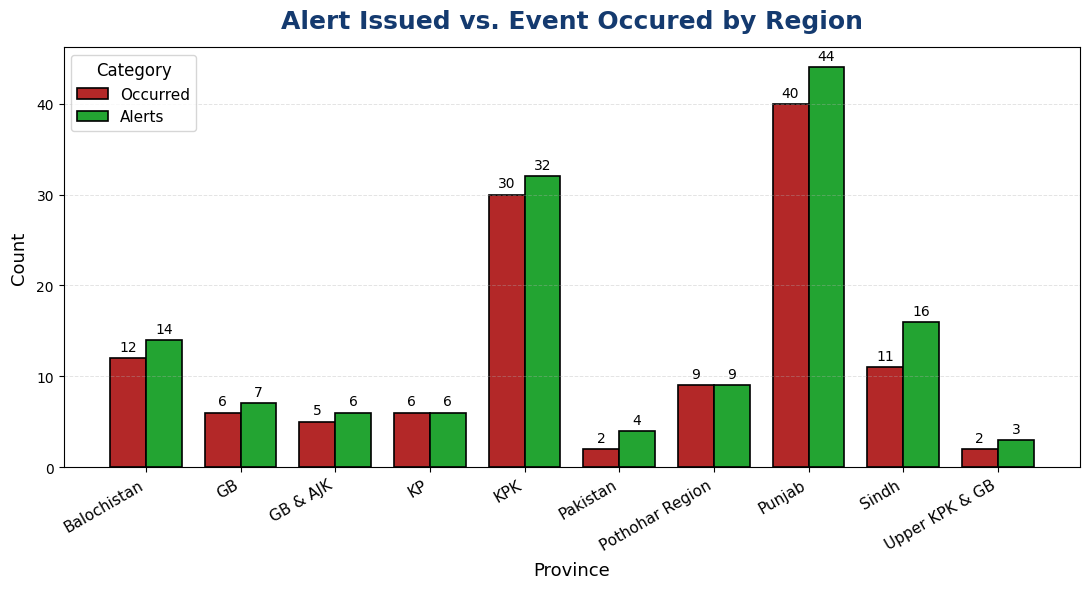

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11, 6))

x = np.arange(len(grouped.index))        # numeric positions for provinces
bar_width = 0.38                         # width of each bar

# Bars with black borders
bars1 = ax.bar(
    x - bar_width/2, grouped["Occurred"],
    width=bar_width, label="Occurred",
    color="#B32828", edgecolor="black", linewidth=1.2
)
bars2 = ax.bar(
    x + bar_width/2, grouped["Alerts"],
    width=bar_width, label="Alerts",
    color="#23a432", edgecolor="black", linewidth=1.2
)

# Title & labels
ax.set_title("Alert Issued vs. Event Occured by Region", fontsize=18, fontweight="bold", color="#143A6F", pad=14)
ax.set_xlabel("Province", fontsize=13, labelpad=6)
ax.set_ylabel("Count", fontsize=13, labelpad=6)

# X ticks
ax.set_xticks(x)
ax.set_xticklabels(grouped.index, rotation=30, ha="right", fontsize=11)

# Grid
ax.grid(True, axis="y", linestyle="--", linewidth=0.7, alpha=0.35)

# Legend
ax.legend(title="Category", fontsize=11, title_fontsize=12, loc="upper left")

# Labels on bars
ax.bar_label(bars1, padding=3, fontsize=10, color="black")
ax.bar_label(bars2, padding=3, fontsize=10, color="black")

plt.tight_layout()
plt.show()


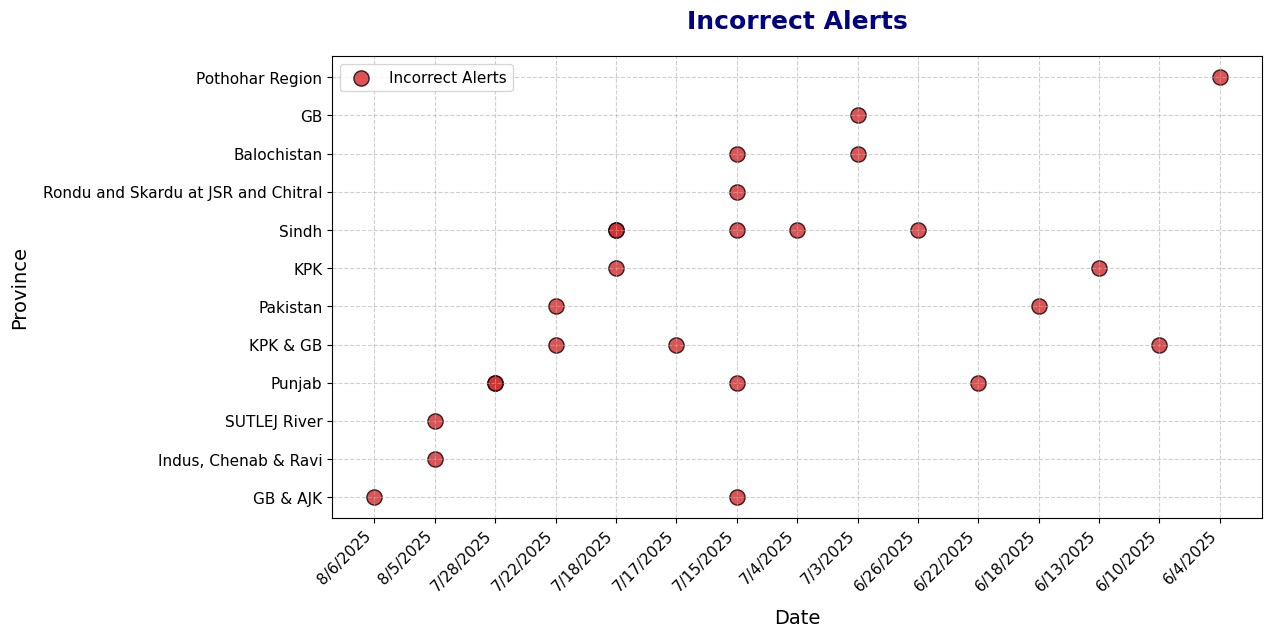

In [7]:
no_occurrence = data[data["Occurred"] == 0]

fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot
ax.scatter(
    no_occurrence["Date"], no_occurrence["Province"], 
    color="#d62728", edgecolor="black", s=120, marker="o", alpha=0.8,
    label="Incorrect Alerts"
)

# Styling
ax.set_title("Incorrect Alerts", fontsize=18, fontweight="bold", color="navy", pad=20)
ax.set_xlabel("Date", fontsize=14, labelpad=10)
ax.set_ylabel("Province", fontsize=14, labelpad=10)

# Rotate and beautify ticks
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=11)

# Add grid for clarity
ax.grid(True, linestyle="--", alpha=0.6)

# Legend styling
ax.legend(fontsize=11, title_fontsize=12, loc="upper left", frameon=True)

plt.show()


In [ ]:
# Efficiency calculation
total = len(data)
correct = (data["Alerts"] == data["Occurred"]).sum()
efficiency = (correct / total) * 100
print(f"Efficiency: {efficiency:.2f}%")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(data["Occurred"], data["Alerts"])
precision = precision_score(data["Occurred"], data["Alerts"])
recall = recall_score(data["Occurred"], data["Alerts"])
f1 = f1_score(data["Occurred"], data["Alerts"])

print(f"Accuracy:  {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall:    {recall:.2%}")
print(f"F1 Score:  {f1:.2%}")


Efficiency: 0.00%
Accuracy:  85.63%
Precision: 85.63%
Recall:    100.00%
F1 Score:  92.26%


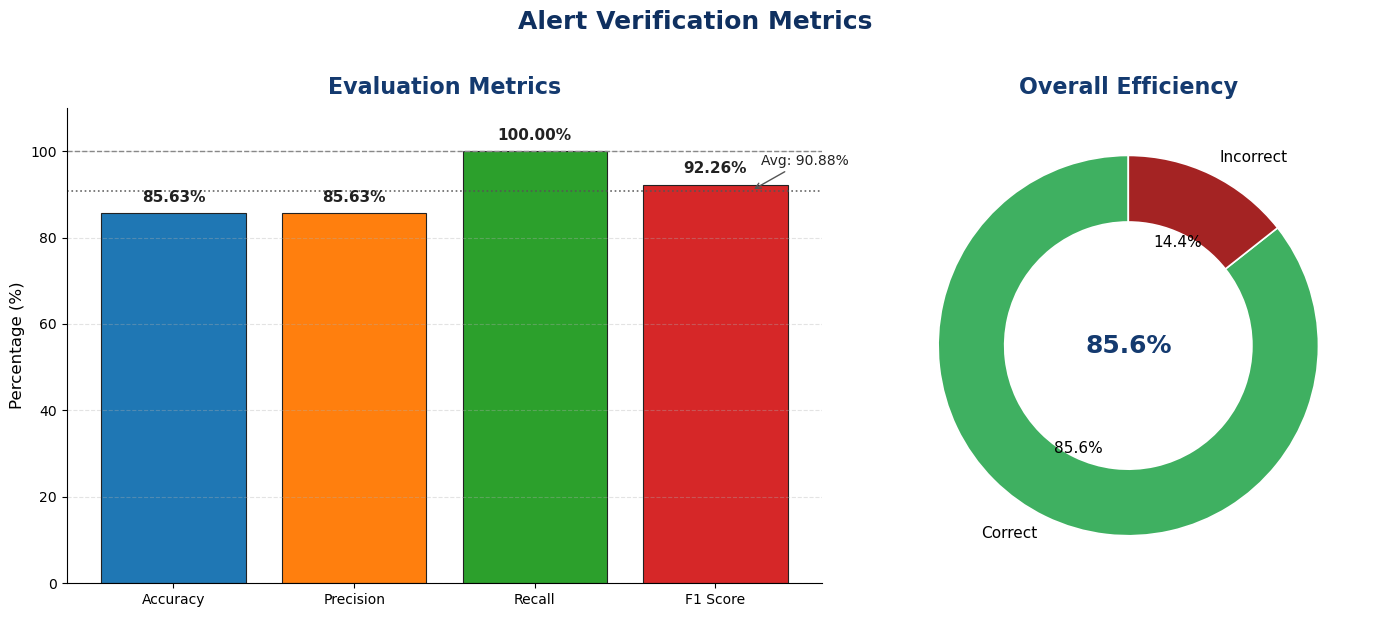

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Inputs (binary 0/1)
y_true = data["Occurred"].astype(int).to_numpy()
y_pred = data["Alerts"].astype(int).to_numpy()

# --- Efficiency & metrics
total   = len(y_true)
correct = int((y_true == y_pred).sum())
incorrect = total - correct
efficiency_pct = (correct / total * 100) if total else 0.0

accuracy  = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall    = recall_score(y_true, y_pred, zero_division=0)
f1        = f1_score(y_true, y_pred, zero_division=0)

metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
metric_perc  = [accuracy*100, precision*100, recall*100, f1*100]
avg_metric   = float(np.mean(metric_perc)) if total else 0.0

# --- Figure (bars + efficiency donut)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={"width_ratios": [1.5, 1]}, facecolor="white")

# (1) Metrics Bar
ax_bar = axes[0]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
bars = ax_bar.bar(metric_names, metric_perc, color=colors, edgecolor="#222", linewidth=0.8)
ax_bar.bar_label(bars, labels=[f"{p:.2f}%" for p in metric_perc], padding=6, fontsize=11, weight="bold", color="#222")
ax_bar.axhline(100, color="#888", lw=1, ls="--")
if total:
    ax_bar.axhline(avg_metric, color="#555", lw=1.2, ls=":", alpha=0.9)
    ax_bar.annotate(f"Avg: {avg_metric:.2f}%",
                    xy=(3.2, avg_metric), xytext=(3.25, avg_metric+6),
                    arrowprops=dict(arrowstyle="->", color="#555", lw=1),
                    fontsize=10, color="#222")
ax_bar.set_ylim(0, max(105, (max(metric_perc) if total else 0) + 10))
ax_bar.set_ylabel("Percentage (%)", fontsize=12)
ax_bar.set_title("Evaluation Metrics", fontsize=16, fontweight="bold", color="#143A6F", pad=10)
ax_bar.grid(True, axis="y", linestyle="--", alpha=0.35)
for s in ["top", "right"]:
    ax_bar.spines[s].set_visible(False)

# (2) Efficiency Donut
ax_donut = axes[1]
values = [correct, incorrect] if total else [1, 0]
labels = ["Correct", "Incorrect"] if total else ["No data", ""]
wedges, texts, autotexts = ax_donut.pie(
    values,
    labels=labels,
    autopct="%1.1f%%" if total else None,
    startangle=90,
    colors=["#3FB061", "#a42323"],
    wedgeprops={"width": 0.35, "edgecolor": "white", "linewidth": 1.2},
    textprops={"fontsize": 11}
)
ax_donut.text(0, 0, f"{efficiency_pct:.1f}%", ha="center", va="center",
              fontsize=18, fontweight="bold", color="#143A6F")
ax_donut.set_title("Overall Efficiency", fontsize=16, fontweight="bold", color="#143A6F", pad=10)

fig.suptitle("Alert Verification Metrics", fontsize=18, fontweight="bold", color="#0F3060", y=1.02)
plt.tight_layout()
plt.show()


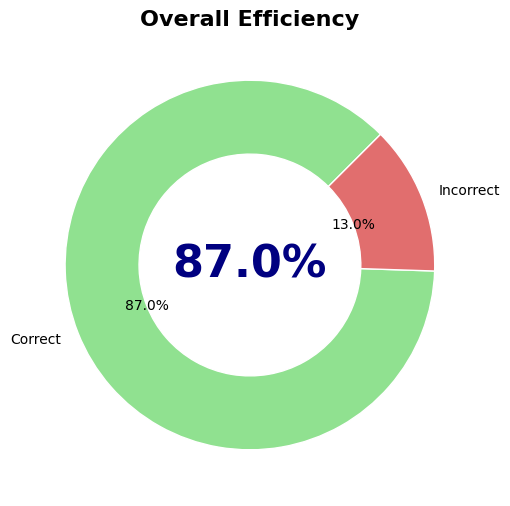

In [18]:
import matplotlib.pyplot as plt

# Efficiency calculation
correct = (data["Alerts"] == data["Occurred"]).sum()
total = len(data)
incorrect = total - correct
efficiency = (correct / total) * 100

# Donut chart
fig, ax = plt.subplots(figsize=(6,6))
ax.pie([correct, incorrect], 
       labels=["Correct", "Incorrect"],
       autopct='%1.1f%%', startangle=45,
       colors=["#90e190", "#e16e6e"],
       wedgeprops={"width":0.4, "edgecolor":"white"})

# Center text
ax.text(0, 0, f"{efficiency:.1f}%", ha="center", va="center", 
        fontsize=32, fontweight="bold", color="navy")

plt.title("Overall Efficiency", fontsize=16, fontweight="bold")
plt.show()
